# Projet Trottinettes

**MDI230 - Files d'attente**

S2-P4 2022/23

* MONTES, Julia Soledad.
* PARAFATI, Mauro.
* PONS, Bruno.

## 1. Modalités

Le travail peut se faire en monôme, binôme, ou trinôme. Les groupes ne peuvent pas changer pendant la durée du projet ou d’un projet à l’autre. Vous pouvez faire la simulation dans le langage de votre choix, nous vous conseillons Python ou Matlab. Une attention toute particulière sera donnée à la rédaction de vos rapports. Par exemple, un bout de code Python non explicité par ailleurs ne donnera aucun point. Le format privilégié est Jupyter notebook qui donne la possibilité d’intégrer à la fois le code Python, les calculs théoriques en Markdown, et la rédaction. Nous rappelons que le plagiat est interdit. Tout plagiat partiel ou total entre étudiants de l’UE, ou sur des ressources extérieures sera sanctionné par la note de 0, et pourra faire l’objet d’un signalement à la Direction de l’Enseignement pour une sanction plus forte. L’inscription au groupe et les rendus se font exclusivement sur le site pédagogique eCampus de l’UE. La date limite pour le rendu est le 27 juin 2023 à 23h59.

## 2. Présentation

On considère un système de **trottinettes électriques** en libres services :

* Les trottinettes peuvent être empruntées et déposées n’importe où.
* Lorsqu’une trottinette a sa batterie vide, un prestataire vient la chercher pour la recharger.
* Lorsqu’une trottinette est en panne, un technicien vient la chercher pour la réparer.
* Il y a une flotte de $N$ trottinettes.
* Le taux d’emprunt moyen est de $λ$ trottinettes par minute.
* On note $t_{trajet}$ le temps moyen d’un trajet par un utilisateur.
* On considère que chaque trottinette a une probabilité $p_{panne}$ de tomber en panne et une probabilité $p_{vide}$ d’avoir sa batterie vide lorsqu’elle est utilisée.
* On suppose qu’une trottinette non utilisée ne peut pas tomber en panne ou avoir une batterie vide. 
* On note enfin $t_{intervention}$ le temps moyen d’intervention d’un prestataire ou d’un technicien, $t_{recharge}$ le temps moyen de recharge de la batterie d’une trottinette, et $t_{réparation}$ le temps moyen de réparation pour une trottinette.
* On considère qu’il y a suffisamment de prestataires et de techniciens pour chercher, charger et réparer les trottinettes qui en ont besoin simultanément.
* On suppose que les trottinettes sont toujours réparables.

## 3. Valeurs numériques des paramètres

Les valeurs numériques des paramètres sont données ci-dessous :

* $N = 100$
* $λ = 0.1 \text{ min}^{−1}$
* $t_{trajet} = 5 \text{ min}$
* $p_{panne} = 0.01$
* $p_{vide} = 0.1$
* $t_{intervention} = 30 \text{ min}$
* $t_{recharge} = 240 \text{ min}$
* $t_{réparation} = 720 \text{ min}$

In [6]:
N = 100 # Number of scooters
λ = 0.1  # Average borrowing rate per minute (in min ^-1)
t_journey = 5 # Average journey time by one user (in min)
p_breakdown = 0.01 # Probability of breakdown
p_empty = 0.1 # Probability of having its battery empty while it is being used
t_intervention = 30 # Average time of intervention taken  by a service provider or technician (in min)
t_recharge = 240 # Average time taken to recharge the battery of a scooter (in min)
t_repair = 720 # Average repair time for a scooter (in min)

In [7]:
!pip install graphviz

In [8]:
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import statistics 
import graphviz

## 4. Travail à effectuer

### 1. Proposez un processus de Markov permettant de modéliser ce système à partir d’un modèle vu en cours. Vous préciserez l’espace d’état et les différents paramètres du système, vous pouvez vous aider d’un diagramme de transitions.

To model the self-service electric scooter system as a Markov process we used the colonies model. Where each colony, represents the different state a scooter can be in. The possible states in this system are as follows:

- Available : The scooter is available for borrowing and is in working condition.
- In use: The scooter has been borrowed and is currently in use by a user.
- Broken down: The scooter has encountered a breakdown and requires repair.
- Battery empty: The scooter's battery has been depleted and needs to be recharged.

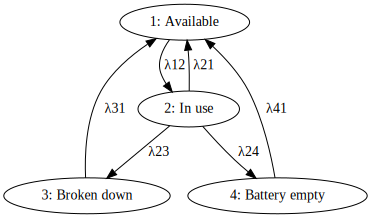

In [9]:
dot = graphviz.Digraph()

# Define the nodes
dot.node('A', '1: Available')
dot.node('U', '2: In use')
dot.node('B', '3: Broken down')
dot.node('E', '4: Battery empty')

# Define the edges with labels
dot.edge('A', 'U', 'λ12')
dot.edge('U', 'A', 'λ21')
dot.edge('U', 'B', 'λ23')
dot.edge('U', 'E', 'λ24')
dot.edge('B', 'A', 'λ31')
dot.edge('E', 'A', 'λ41')

# Render the graph
dot

Legend:

- $λ_{ij}$: Transition rate from state $i$ to state $j$
- $λ_{12} = λ $
- $λ_{21} = \frac{1}{time_{journey}} * (1 - p_{breakdown} * p_{empty})$
- $λ_{23} = \frac{1}{t_{intervention}} * p_{breakdown}$
- $λ_{24} = \frac{1}{t_{intervention}} * p_{empty}$
- $λ_{31} = \frac{1}{t_{repair}}$
- $λ_{31} = \frac{1}{t_{recharge}}$


<!-- To model the self-service electric scooter system for N scooters, we can extend the Markov process to incorporate multiple scooters. The state space will now include the states for each individual scooter. Let's denote the state space as E, where each state represents the status of all N scooters. -->
<!-- REWRITE THE ABOVE -->

To model the self-service electric scooter system for N scooters, we can use the model of Colonies.

The state space E can be defined as follows:

$$E = \{n = (n_1, n_2, n_3, n_4) | \sum_{j=1}^{4} n_j = N \}$$

Where:

There are 4 colonies and $n_j$ represents the number of scooters in a certain colony, each colony is described below:
- $1$: Colony where scooter is available.
- $2$: Colony where scooter is in use.
- $3$: Colony where scooter is broken down.
- $4$: Colony where scooter has an empty battery.

### 2. Calibrez votre modèle en explicitant vos paramètres en fonction des données de l’énoncé.
<!-- Calibrate your model by explaining your parameters based on the data in the statement. -->

In [10]:
## Transition rates
# q(n, Ti,j(n)) = phi_i(n_i) * lambda_ij
# phi_1(n_1) = n_1
# phi_2(n_2) = n_2
# phi_3(n_3) = n_3
# phi_4(n_4) = n_4
lambda_12 = λ
lambda_21 = 1/t_journey * (1 - p_breakdown * p_empty)
lambda_23 = 1/t_intervention * p_breakdown
lambda_24 = 1/t_intervention * p_empty
lambda_31 = 1/t_repair
lambda_41 = 1/t_recharge

###  3. Donnez l’expression de la probabilité stationnaire théorique de votre modèle.

By theorem:

Theorem 2.4

The equilibrium distribution for a closed migration process is
$$
\pi(n)=K^{-1} \prod_{j=1}^J \frac{\alpha_j^{n_j}}{\prod_{r=1}^{n_j} \phi_j(r)}, \quad n \in E
$$
Here, $K$ is a normalizing constant, chosen so the distribution sums to 1 , and $\left(\alpha_j\right)$ are the solution to the traffic equations displayed below.

$\begin{gathered}\alpha_j>0, \quad \sum_j \alpha_j=1, \\ \alpha_j \sum_k \lambda_{j k}=\sum_k \alpha_k \lambda_{k j}, \quad j=1,2, \ldots, J .\end{gathered}$

In this particular case:
$$
\pi(n)=K^{-1} \frac{\alpha_1^{n_1}}{n_1!} \frac{\alpha_2^{n_2}}{n_2!} \frac{\alpha_3^{n_3}}{n_3!} \frac{\alpha_4^{n_4}}{n_4!} , \quad n \in (n_1,n_2,n_3,n_4)
$$

In [12]:
A = np.array([[lambda_12, -lambda_21, -lambda_31 ,-lambda_41],
              [-lambda_12,lambda_21 + lambda_23 + lambda_24, 0 ,0],
              [0,-lambda_23,lambda_31,0],
              [lambda_24,0,lambda_24,lambda_24 + lambda_41]] )
alphas = np.zeros(4)
alphas = np.linalg.solve(A, np.array([0,0,0,lambda_24]))

print(alphas)
print(np.sum(alphas))

[0.49934555 0.24541885 0.05890052 0.19633508]
1.000000000000001


### 4. Simulez les trajectoires de votre modèle sur au moins 100h.

In [156]:
def computeTransitionMatrix(_state):
    """
    Compute the transition matrix for the given state.

    Args:
        _state (np.array 4x1): The state of the system

    Returns:
        tm (np.array 4x4) : The transition matrix
    """
    
    tm = np.array([[0,lambda_12*_state[0],0,0],
                   [lambda_21*_state[1],0,lambda_23*_state[1],lambda_24*_state[1]],
                   [lambda_31*_state[2],0,0,0],
                   [lambda_41*_state[3],0,0,0]])
    return tm

In [121]:
def new_state(state, transition_matrix, lambda_tot):
    """
    This function allows to determine the new state of our model.
    To determine which event took place, we use the fact that the
    probability that event i with parameter lambda_i is the one
    that took place is lambda_i / lambda_tot.

    Args:
    - states: np.array of shape 4x1 which represents the number of
...           scooters in each state.
    - transition_matrix: np.array of shape 4x4 which represents the
...                      transition matrix of the system.
    - lambda_tot: sum of the parameters of the possible events.

    Retruns:
    - new_state: np.array of shape 4x1 which represents the new state
...              of the system.
    """
    
    new_state = state.copy()
    tm_arr = np.asarray(transition_matrix).reshape(-1)
    choice = np.arange(16)
    transition = np.random.choice(choice, p=tm_arr/lambda_tot)
    match transition:
        case 1:
            new_state[0] -= 1
            new_state[1] += 1
        case 4:
            new_state[1] -= 1
            new_state[0] += 1
        case 6:
            new_state[1] -= 1
            new_state[2] += 1
        case 7:
            new_state[1] -= 1
            new_state[3] += 1
        case 8:
            new_state[2] -= 1
            new_state[0] += 1
        case 12:
            new_state[3] -= 1
            new_state[0] += 1
        case _:
            pass
    return new_state

In [224]:
def simulate_colony_model(sim_time, num_clients):
    """_summary_
    Function that simulates the evolution of the colony model through time.

    Args:
        sim_time: Time of simulation (in min)
        num_clients: Number of clients

    Returns:
        states: np.array of shape (n,4) which represents the change of
...             state of the system through time.
    """
    
    
    current_state = np.array([num_clients,0,0,0]) # Initial state
    states = [current_state]
    time = 0
    t = 0
    T = [time]

    while time < sim_time:
        tm = computeTransitionMatrix(current_state)
        lambda_tot = np.sum(tm)
        t = np.random.exponential(1/lambda_tot)
        if time + t > sim_time:
            break
        time += t
        T.append(int(time))
        # According to the probability of each event, we draw the next event
        current_state = new_state(current_state, tm, lambda_tot)
        states.append(current_state)
    
    T = np.array(T)
    states = np.array(states)
    return states, T

# Simulation parameters
sim_time = 100*60
num_scooters = 2

# Run simulation
states_sim, time = simulate_colony_model(sim_time, num_scooters)

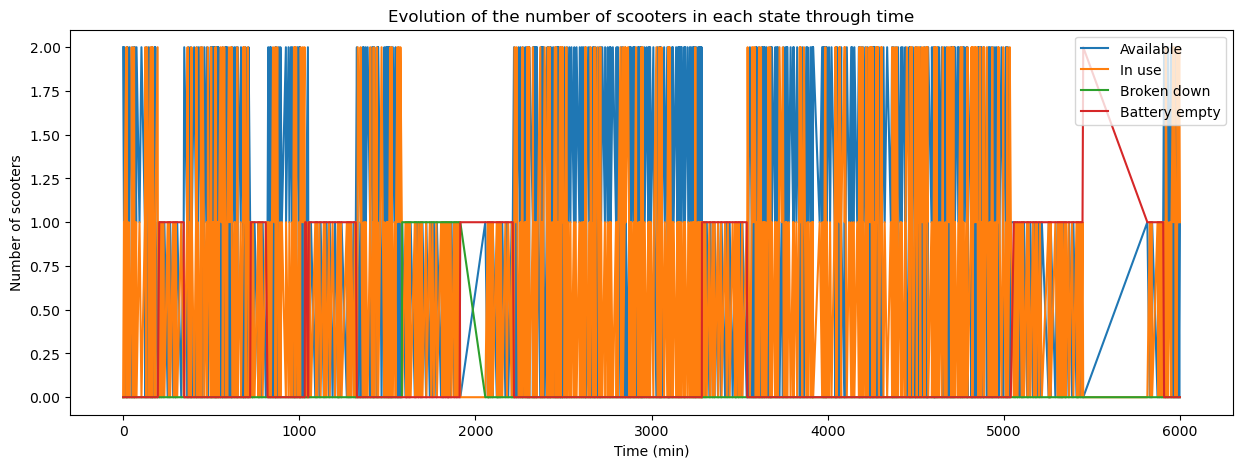

In [225]:
# Plot the evolution of the states through time
def plot_simulation(states, time):
    plt.figure(figsize=(15,5))
    plt.plot(time, states[:,0], label='Available')
    plt.plot(time, states[:,1], label='In use')
    plt.plot(time, states[:,2], label='Broken down')
    plt.plot(time, states[:,3], label='Battery empty')
    plt.xlabel('Time (min)')
    plt.ylabel('Number of scooters')
    plt.title('Evolution of the number of scooters in each state through time')
    plt.legend()
    plt.show()

plot_simulation(states_sim, time)

### 5. Validate your simulation thanks to the theoretical results. For this, we will limit the number of scooters to $N = 2$. You will have to propose two ways of approaching the stationary probability by your simulations. Remember that a simulation is valid if the theoretical results are within the confidence interval of the simulated results.

In [226]:
import itertools
import math


def possible_states(states, num_scooters):
    """
    This function allows to determine the possible states of our model.

    Args:
    - states: num of possible scooter in a state.
    - num_scooters: number of scooters in the system.
    
    Returns:
    - possible_states: np.array of shape nx4 which represents the
...                    possible states of the system.
    """
    possibilities = [p for p in itertools.product(states, repeat=4)]
    real_possibilities = []
    for p in possibilities:
        if sum(p) == num_scooters:
            real_possibilities.append(p)
    
    return np.array(real_possibilities)

# states = [0,1,2]
states = np.arange(num_scooters+1)

possible_states = possible_states(states, num_scooters)
print(possible_states)

[[0 0 0 2]
 [0 0 1 1]
 [0 0 2 0]
 [0 1 0 1]
 [0 1 1 0]
 [0 2 0 0]
 [1 0 0 1]
 [1 0 1 0]
 [1 1 0 0]
 [2 0 0 0]]


In [227]:
# Calculate the normalisation constant for the stationary distribution
def find_normalisation_constant(possible_states):
    """
    This function allows to determine the normalisation constant of the
    stationary distribution.

    Args:
    - possible_states: np.array of shape nx4 which represents the
...                      possible states of the system.

    Returns:
    - K: normalisation constant of the stationary distribution.
    """

    K = 0
    for states in possible_states:
        # Compute the stationary probability of the current state
        fact_states = math.factorial(states[0]) * math.factorial(states[1]) * math.factorial(states[2]) * math.factorial(states[3])
        pi = 1/fact_states * np.prod(alphas**states)
        K += pi
    
    return K
    
K = find_normalisation_constant(possible_states)
print(K)


def stationary_distribution(states, K):
    """
    This function allows to determine the stationary distribution of
    our model.

    Args:
    - states: np.array of shape nx4 which represents the possible
...           states of the system.
    - K: normalisation constant of the stationary distribution.
    
    Returns:
    - pi: np.array of shape nx1 which represents the stationary
...         distribution of the system.
    """

    pi = []
    for state in states:
        # Compute the stationary probability of the current state
        fact_state = math.factorial(state[0]) * math.factorial(state[1]) * math.factorial(state[2]) * math.factorial(state[3])
        pi.append(1/(fact_state*K) * np.prod(alphas**state))
    
    return np.array(pi)

pi = stationary_distribution(possible_states, K)
print("Possible states: \n", possible_states)
print(pi)



0.5000000000000012
Possible states: 
 [[0 0 0 2]
 [0 0 1 1]
 [0 0 2 0]
 [0 1 0 1]
 [0 1 1 0]
 [0 2 0 0]
 [1 0 0 1]
 [1 0 1 0]
 [1 1 0 0]
 [2 0 0 0]]
[0.03854746 0.02312848 0.00346927 0.09636866 0.0289106  0.06023041
 0.1960781  0.05882343 0.24509762 0.24934598]


In [228]:
# MAYBE A WAY TO DO IT
# Calculate the number of times the system is in each state
# Normalize by the total number of states
def number_states(states_sim, possible_states):
    """
    This function allows to determine the number of times the system
    is in each state.

    Args:
    - states_sim: np.array of shape nx4 which represents the change of
...               state of the system through time.
    - possible_states: np.array of shape nx4 which represents the
...                    possible states of the system.

    Returns:
    - states_count: np.array of shape nx1 which represents the number
    """
    states_count = []
    for state in possible_states:
        count = np.sum(np.all(states_sim == state, axis=1))
        states_count.append(count)
    
    states_count = np.array(states_count)
    # Normalise by count of all states
    states_count = states_count/len(states_sim)
    
    return states_count

# Do it only for far in time states (where it becames more stationary)
states_count = number_states(states_sim[:-500], possible_states)
print("Possible states: \n", possible_states)
print("Count of each state: \n", states_count)


Possible states: 
 [[0 0 0 2]
 [0 0 1 1]
 [0 0 2 0]
 [0 1 0 1]
 [0 1 1 0]
 [0 2 0 0]
 [1 0 0 1]
 [1 0 1 0]
 [1 1 0 0]
 [2 0 0 0]]
Count of each state: 
 [0.         0.00143885 0.         0.06906475 0.03741007 0.12805755
 0.07625899 0.03741007 0.38992806 0.26043165]


In [229]:
dif = np.add(states_count,-pi)
print(np.max(dif))

0.1448304382452752


### 6. What should be changed in the model if we finally consider that there is a finite number of service providers $n_p$ and a finite number of technicians $n_t$?